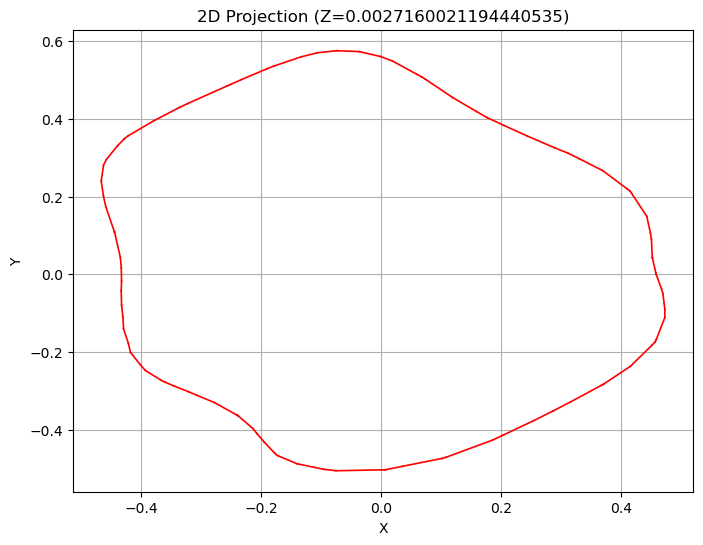

In [80]:
from stl import mesh
import numpy as np
import matplotlib.pyplot as plt 


def intersect_with_z_plane(your_mesh, z0=None):
    
    segments = []

    triangles = your_mesh.vectors

    if z0 is None:
        z0 = your_mesh.get_mass_properties()[1][2]

    for tri in triangles:
        points = []

        for i in range(3):
            p1 = tri[i]
            p2 = tri[(i + 1) % 3]

            z1, z2 = p1[2], p2[2]

            if (z1 - z0) * (z2 - z0) < 0:  # The edge crosses the Z=0 plane
                t = (z0 - z1) / (z2 - z1)
                intersection_point = p1 + t * (p2 - p1)
                points.append(intersection_point)

            elif z1 == z0 and z2 != z0:
                points.append(p1)
            elif z2 == z0 and z1 != z0:
                points.append(p2)

        if len(points) == 2:
            segments.append(points)

    return segments


def plot_segments_2d(segments, z0=None):

    z0 = 0.0 if z0 is None else z0
   
    plt.figure(figsize=(8, 6))

    # Plot the intersection points
    segments_2d = [[(point[0], point[1]) for point in segment] for segment in segments]

    for segment in segments_2d:
        x_coords, y_coords = zip(*segment)
        plt.plot(x_coords, y_coords, color='red', linewidth=1.2)

    # Set limits and labels
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'2D Projection (Z={z0})')
    plt.grid(True)

    plt.show()

if __name__ == "__main__":
    # Load the mesh from a file
    your_mesh = mesh.Mesh.from_file('data/D2_8_0.30_par0_level3.stl')

    # Intersect the mesh with the z=0 plane
    segments = intersect_with_z_plane(your_mesh)

    # Plot the mesh and intersection points
    plot_segments_2d(segments, z0=your_mesh.get_mass_properties()[1][2])
    # Save the intersection points to a file

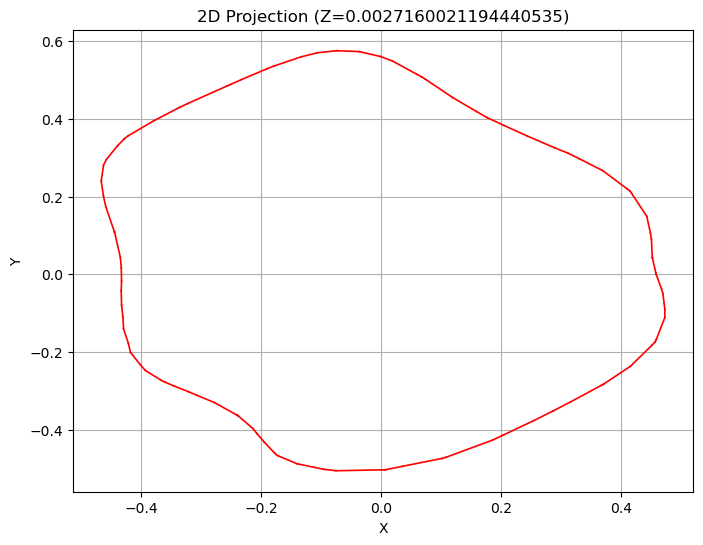

[0.01216914 0.01166415 0.002716  ] 97


In [81]:
your_mesh = mesh.Mesh.from_file('data/D2_8_0.30_par0_level3.stl')


center = your_mesh.get_mass_properties()[1]


segments = intersect_with_z_plane(your_mesh, z0=center[2])
plot_segments_2d(segments, z0=center[2])

print(center, len(segments))

Center of mass: (-0.0323789429883776, 0.011696588335825795)
Center of mass after shifting: (-4.149029344604322e-17, -1.0315345370550746e-16)


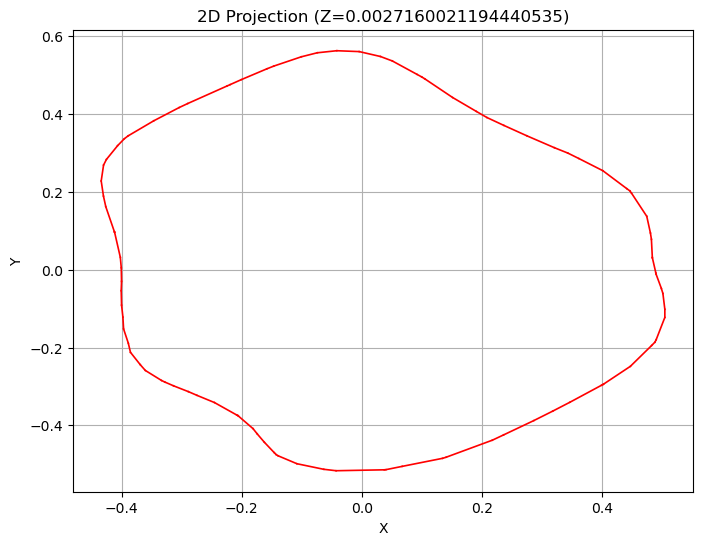

In [82]:
segments_2d = [[point[0:2] for point in segment] for segment in segments]

def center_of_mass(segments_2d):
    x_coords = []
    y_coords = []

    for segment in segments_2d:
        for point in segment:
            x_coords.append(point[0])
            y_coords.append(point[1])

    x_center = sum(x_coords) / len(x_coords)
    y_center = sum(y_coords) / len(y_coords)

    return x_center, y_center


# Calculate the center of mass
x_center, y_center = center_of_mass(segments_2d)
print(f"Center of mass: ({x_center}, {y_center})")

# Shift the segments to make the center of mass (cm) as (0, 0)
shifted_segments_2d = [[[point[0] - x_center, point[1] - y_center] for point in segment] for segment in segments_2d]
x_center_shifted, y_center_shifted = center_of_mass(shifted_segments_2d)
print(f"Center of mass after shifting: ({x_center_shifted}, {y_center_shifted})")

plot_segments_2d(shifted_segments_2d, z0=center[2])

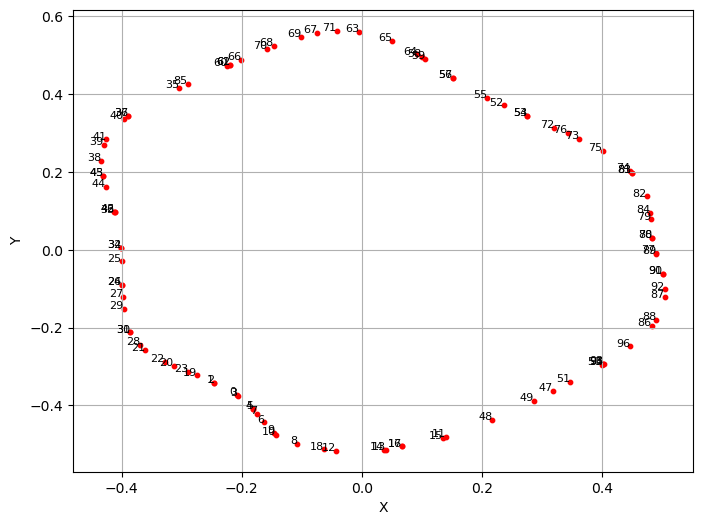

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot only the first pair of coordinates in each segment
for i, segment in enumerate(shifted_segments_2d):
    x_coord, y_coord = segment[0]
    # print(x_coord, y_coord, i)
    ax.scatter(x_coord, y_coord, color='red', s=10)  # Reduced marker size
    ax.text(x_coord, y_coord, str(i), fontsize=8, ha='right')  # Reduced text size
# Set limits and labels

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)      
plt.show()


In [84]:
import numpy as np

offset = 0.002
# Calculate the largest distance
R = max(
    np.linalg.norm(np.array(point) - np.array([x_center_shifted, y_center_shifted])) for segment in shifted_segments_2d for point in segment
) + offset

print(f"Largest distance (R): {R}")


Largest distance (R): 0.5666759452032383


In [85]:
def create_boundary_nodes(n_bn:int, radius:float, center:np.ndarray, line_segments:np.ndarray) -> np.ndarray:
    """
    Create boundary nodes for a circular boundary.
    
    Parameters
    ----------
    n_bn : int
        Number of boundary nodes.
    radius : float
        Radius of the circle.
    center : np.ndarray
        Center of the circle.
    line_segments : np.ndarray
        Line segments defining the boundary.
    
    Returns
    -------
    np.ndarray
        Array of boundary nodes.
    """
    
    # Create an array of angles for the boundary nodes
    nc = []
    intersected_nc = []

    for i in range(n_bn):
        angle = 2 * np.pi * i / n_bn
        x = center[0] + radius * np.cos(angle)
        y = center[1] + radius * np.sin(angle)
        nc.append([x, y])

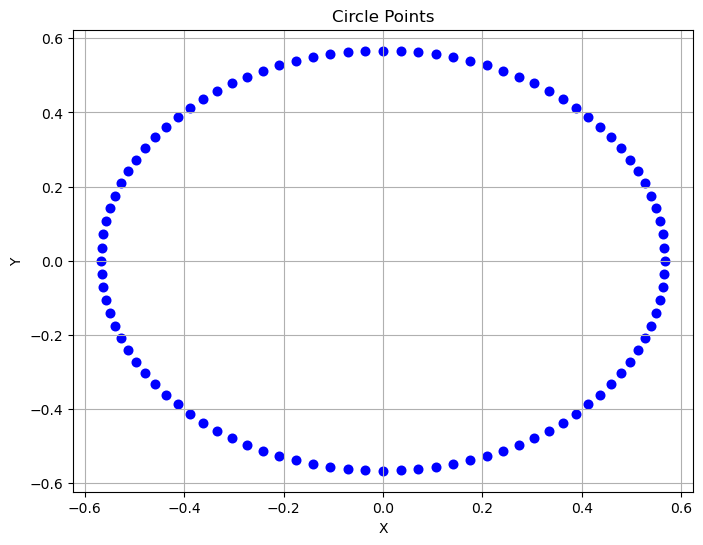

In [86]:
def create_circle(n_bn: int, radius: float, center: np.ndarray):
    nc = []
    for i in range(n_bn):
        angle = 2 *  np.pi / n_bn * i
        nc.append(
            [
                radius * np.cos(angle) + center[0],
                radius * np.sin(angle) + center[1],
            ]
        )
    return nc


n_bn = 100
radius = R
center = np.array([x_center_shifted, y_center_shifted])
circle_points = create_circle(n_bn, radius, center)

def plot_circle(circle_points):
    plt.figure(figsize=(8, 6))
    x_coords, y_coords = zip(*circle_points)
    plt.scatter(x_coords, y_coords, color='blue', linewidth=1.2)

    # Set limits and labels
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Circle Points')
    plt.grid(True)

    plt.show()
    
plot_circle(circle_points)

100 97 100


/tmp/ipykernel_1439651/2109357951.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


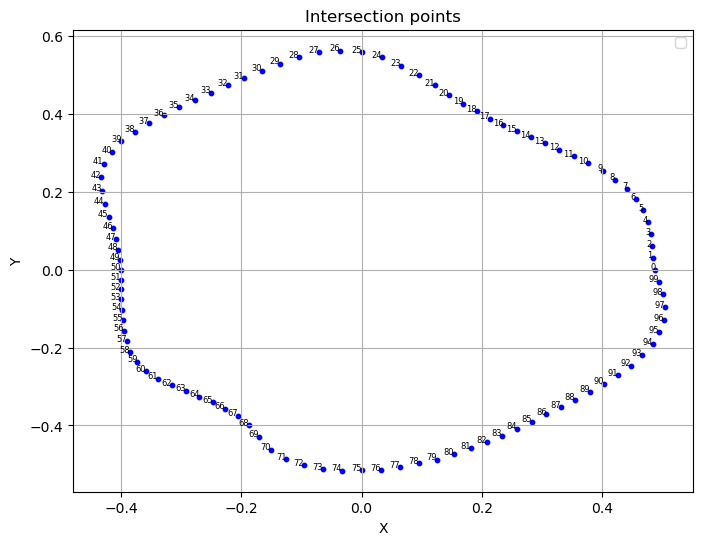

In [87]:

def intersected_boundary_nodes(segments_2d, circle_points, cm):
    """
    Find the intersection points between the segments and the circle.
    """
    intersections = []
    x1, y1 = cm
    
    for nc in circle_points:
        x2, y2 = nc
        for segment in segments_2d:
            x3, y3 = segment[0]
            x4, y4 = segment[1]

            alpha = ((x4 - x3) * (y3 - y1) - (y4 - y3) * (x3 - x1)) / ((x4 - x3) * (y2 - y1) - (y4 - y3) * (x2 - x1))
            beta = ((x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)) / ((x4 - x3) * (y2 - y1) - (y4 - y3) * (x2 - x1))
            if 0 <= alpha <= 1 and 0 <= beta <= 1:
                # Calculate the intersection point
                intersection_x = x3 + beta * (x4 - x3)
                intersection_y = y3 + beta * (y4 - y3)
                intersection = [intersection_x, intersection_y]
                intersections.append(intersection)

    return intersections

intersections = intersected_boundary_nodes(shifted_segments_2d, circle_points, center)


print(len(intersections), len(shifted_segments_2d), len(circle_points))

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

for i, point in enumerate(intersections):
    ax.text(point[0], point[1], str(i), fontsize=6, ha='right')
    ax.scatter(point[0], point[1], color='blue', s=10)  # Reduced marker size

# Add labels, title, and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Intersection points')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

/home/tsaha/anaconda3/envs/spehar/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/tsaha/anaconda3/envs/spehar/lib/python3.12/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


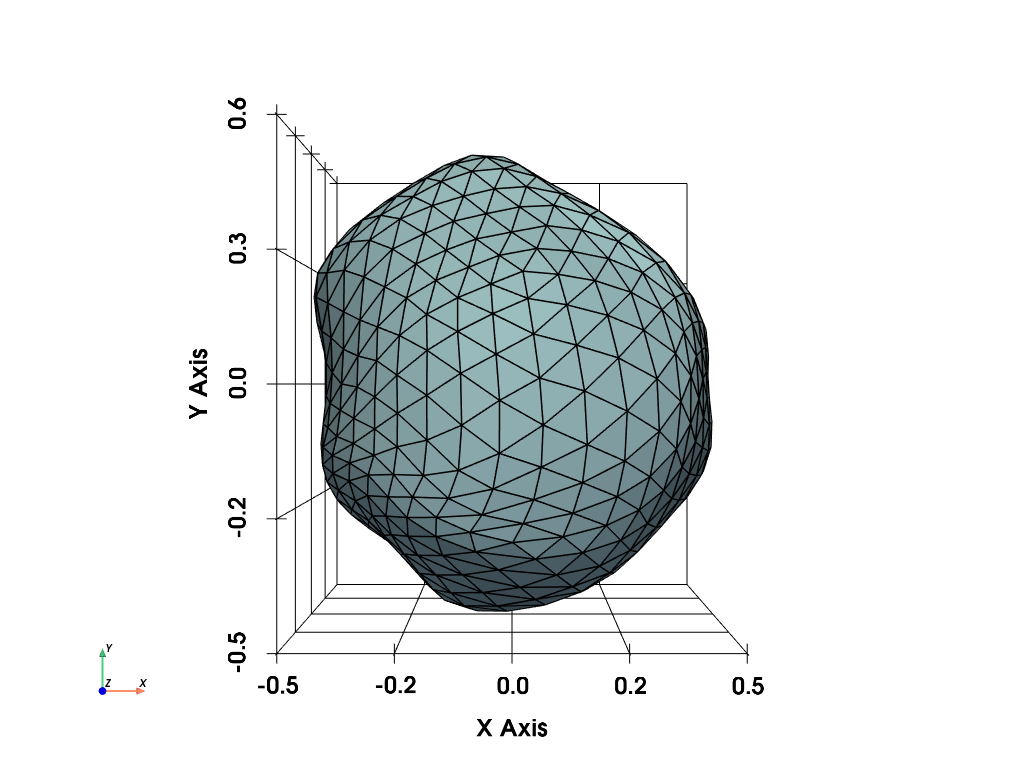

In [89]:
import pyvista as pv

data = pv.read('data/D2_8_0.30_par0_level3.stl')
data.plot(show_edges=True, show_scalar_bar=False, cpos='xy', line_width=1.5, interactive=True, show_grid=True)

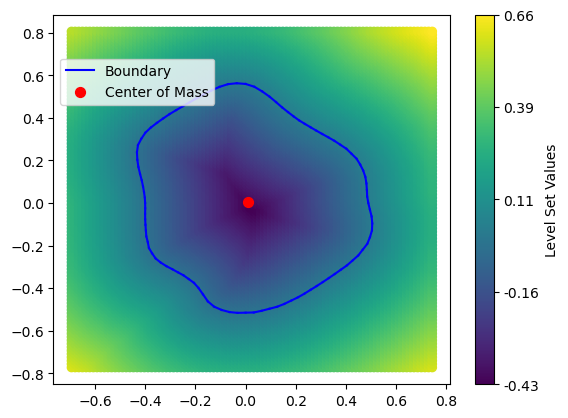

In [93]:
# cm_shift = np.array([1.5, 1.5])
cm_shift = np.array([0, 0])

nc = intersections + cm_shift
offset = 0.5
lsn_x = 100
lsn_y = 100

def get_bounding_box(nc: np.ndarray):
    nc = np.array(nc)
    return np.min(nc[:, 0]), np.max(nc[:, 0]), np.min(nc[:, 1]), np.max(nc[:, 1])

minx, maxx, miny, maxy = get_bounding_box(nc)

def center_of_mass(nc):
    return np.mean(nc, axis=0)
cm = center_of_mass(nc)

def find_R(nc, cm):
    return np.max([np.linalg.norm(n - cm) for n in nc]) 
R = find_R(nc, cm)
def get_grid_size(min_x, max_x, min_y, max_y, lsn_x, lsn_y, offset):
    return (max_x - min_x + offset) / (lsn_x - 1), (max_y - min_y + offset) / (
        lsn_y - 1
    )
def create_lsc(nc: np.ndarray, lsn_x: int, lsn_y: int, offset: float):  
    minx, maxx, miny, maxy = get_bounding_box(nc)
    grid_x, grid_y = get_grid_size(minx, maxx, miny, maxy, lsn_x, lsn_y, offset)
    lsc = []
    for j in range(lsn_x):
        for k in range(lsn_y):
            lsc.append(
                [
                    minx + j * grid_x - offset / 2,
                    miny + k * grid_y - offset / 2 
                ]
            )
    return lsc

lsc = create_lsc(nc, lsn_x, lsn_y, offset)

def distance_func(q, p1, p2):
    q, p1, p2 = map(np.array, (q, p1, p2))
    u = p2 - p1
    v = q - p1

    conditional_value = np.dot(u, v) / np.linalg.norm(u)**2
    
    return (
        np.linalg.norm(q - (p1 + conditional_value * u)) if 0 <= conditional_value <= 1 else
        np.linalg.norm(p1 - q) if conditional_value < 0 else
        np.linalg.norm(p2 - q)
    )

def ray_casting(p, nc):
    x, y = p
    n_vertices = len(nc)
    intercept = 0

    for i in range(n_vertices):
        x1, y1 = nc[i]
        x2, y2 = nc[(i+1) % n_vertices]

        if (y < y1) != (y < y2) and x < x1 + ((y - y1) / (y2 - y1) * (x2 - x1)):
            intercept += 1

    return intercept % 2 == 1

def calculate_lsv(nc: np.ndarray, lsc:np.ndarray):
    lsv = []
    signs = []
    for p in lsc:
        min_dist = np.inf
        for i in range(len(nc)):
            dist = distance_func(p, nc[i], nc[(i+1) % len(nc)])
            # print(f"node : {i}, lsc: {p}, dist: {dist} ")
            if dist < min_dist:
                min_dist = dist 
        lsv.append(min_dist)
        signs.append(ray_casting(p, nc))
    # for i in range(len(lsc)):
        # print(f"ls: {i}, lsc: {lsc[i]}, lsv:{lsv[i]}, sign: {signs[i]}")
    for i in range(len(signs)):
        lsv[i] = lsv[i] * (-1 if signs[i]==True else 1)
    return lsv 
lsv = calculate_lsv(nc, lsc)
lsc = lsc - cm

# plot
fig, ax = plt.subplots() 

for i in range(len(nc)):
    x1, y1 = nc[i]
    x2, y2 = nc[(i+1) % len(nc)]
    ax.plot([x1, x2], [y1, y2], "b-", label="Boundary" if i == 0 else "")

lsc = np.array(lsc)
lsv = np.array(lsv)
nc = np.array(nc)

sc = ax.scatter(lsc[:, 0], lsc[:, 1], c=lsv, cmap='viridis', marker='o')
cbar = fig.colorbar(sc, ax=ax, label='Level Set Values')
ticks = np.linspace(lsv.min(), lsv.max(), num=5)
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{tick:.2f}' for tick in ticks])

ax.scatter(cm[0], cm[1], color='red', s=50, label='Center of Mass')

if n_bn <=10:
    for i in range(len(nc)):
        ax.text(nc[i][0], nc[i][1], f"{i}", fontsize=14)
if lsn_x <= 10:
    for i in range(len(lsc)):
        ax.text(lsc[i][0] + 0.05, lsc[i][1] + 0.05, f"{i}", fontsize=8, color='blue')

ax.legend(loc="upper left", bbox_to_anchor=(0, 0.9))
# ax.grid(True)
plt.show() 

Try out with Epicycles:

- Ref: http://brettcvz.github.io/epicycles/